In [1]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


import pandas as pd

In [2]:


newsgroups = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))



In [3]:
target_dict = dict(enumerate(newsgroups['target_names']))

df = pd.DataFrame(zip(newsgroups['data'], newsgroups['target']),  
                  columns = ['text','newsgroup'])

df['newsgroup'].replace(target_dict, inplace = True)

df.sample(5)

,text,newsgroup
3289,\n(Deletion)\n \nSince this drivel is also cr...,talk.religion.misc
8997,This is fascinating. Atheists argue for aborti...,alt.atheism
1286,\n\nI won't even recommend books from my congr...,soc.religion.christian
2481,"\n\nNo, VL-bus IDE is no faster than ISA IDE. ...",comp.sys.ibm.pc.hardware
290,I have an applicationShell which uses a colorm...,comp.windows.x


In [5]:
# https://stackoverflow.com/questions/52986253/scoring-strategy-of-sklearn-model-selection-gridsearchcv-for-latentdirichletallo

class LDAp(LatentDirichletAllocation):

    def score(self, X, y=None):

        # You can change the options passed to perplexity here
        score = super(LDAp, self).perplexity(X, sub_sampling=False)

        # Since perplexity is lower for better, so we do negative
        return -1*score
    

In [6]:
vectorizer = CountVectorizer(stop_words='english')

In [7]:
tm = LDAp(verbose=1, evaluate_every = 5, perp_tol = 1, max_iter = 100, )

In [8]:
pipe = Pipeline(steps=[('vectorizer', vectorizer), 
                       ('tm', tm)])

In [9]:
param_grid = {'tm__n_components': [15,16,17],
             'vectorizer__max_features' : [500, 750, 1000]}

In [10]:
search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=3, verbose=1)
search.fit(df['text'])

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed: 12.8min finished


iteration: 1 of max_iter: 100
iteration: 2 of max_iter: 100
iteration: 3 of max_iter: 100
iteration: 4 of max_iter: 100
iteration: 5 of max_iter: 100, perplexity: 126.2721
iteration: 6 of max_iter: 100
iteration: 7 of max_iter: 100
iteration: 8 of max_iter: 100
iteration: 9 of max_iter: 100
iteration: 10 of max_iter: 100, perplexity: 123.3526
iteration: 11 of max_iter: 100
iteration: 12 of max_iter: 100
iteration: 13 of max_iter: 100
iteration: 14 of max_iter: 100
iteration: 15 of max_iter: 100, perplexity: 122.5060


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('tm',
                                        LDAp(evaluate_every=5, max_iter=100,
                                             perp_tol=1, verbose=1))]),
             n_jobs=-1,
             param_grid={'tm__n_components': [15, 16, 17],
                         'vectorizer__max_features': [500, 750, 1000]},
             verbose=1)

In [11]:
gs_df = pd.DataFrame(search.cv_results_)

In [12]:
gs_df.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_tm__n_components,param_vectorizer__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,197.734406,1.230575,5.450848,0.118037,16,500,"{'tm__n_components': 16, 'vectorizer__max_feat...",-165.160821,-110.524642,-139.244856,-138.310107,22.314918,1
0,174.010780,20.709833,7.016777,1.475241,15,500,"{'tm__n_components': 15, 'vectorizer__max_feat...",-166.123953,-111.560702,-139.224190,-138.969615,22.276081,2
6,188.166911,15.163499,5.148619,0.113398,17,500,"{'tm__n_components': 17, 'vectorizer__max_feat...",-168.291225,-110.933535,-140.001662,-139.742141,23.416898,3
4,219.519567,13.366801,5.406644,0.360835,16,750,"{'tm__n_components': 16, 'vectorizer__max_feat...",-257.140948,-175.215892,-216.554260,-216.303700,33.446233,4
1,200.441769,4.279808,5.342746,0.043774,15,750,"{'tm__n_components': 15, 'vectorizer__max_feat...",-257.311484,-173.333908,-220.263989,-216.969794,34.362743,5
7,202.673157,31.004225,3.043595,0.710157,17,750,"{'tm__n_components': 17, 'vectorizer__max_feat...",-261.169550,-173.450057,-217.664495,-217.428034,35.811723,6
8,145.945184,6.601908,1.663417,0.383754,17,1000,"{'tm__n_components': 17, 'vectorizer__max_feat...",-342.497679,-237.903164,-286.501286,-288.967376,42.736124,7
2,270.528371,26.404119,5.212269,0.085502,15,1000,"{'tm__n_components': 15, 'vectorizer__max_feat...",-344.446326,-236.000742,-293.386041,-291.277703,44.297818,8
5,245.811773,22.945225,5.499825,1.028813,16,1000,"{'tm__n_components': 16, 'vectorizer__max_feat...",-347.713260,-236.745088,-295.470062,-293.309470,45.328320,9


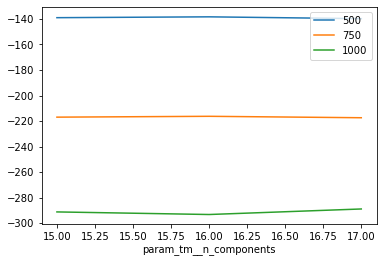

In [24]:
%matplotlib inline

df = gs_df.copy()

df.set_index('param_tm__n_components', inplace=True)
df.groupby('param_vectorizer__max_features')['mean_test_score'].plot(legend=True);



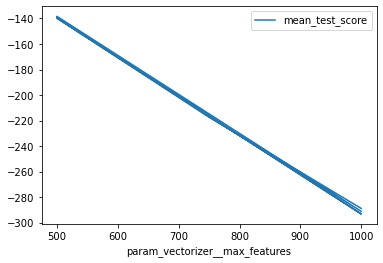

In [20]:
gs_df.set_index('param_tm__n_components').plot.line(x='', y='')

In [12]:
cvectorizer = CountVectorizer(stop_words='english', min_df = .005 )
cvectorizer.fit(df['text'])
len(cvectorizer.get_feature_names())

2419

In [13]:
CountVectorizer?